In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report 

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler 

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 


from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 


import matplotlib.pyplot as plt
import seaborn as sns


#input the directory

import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#read file

df = pd.concat([pd.read_csv('data/fraudTrain.csv'),pd.read_csv('data/fraudTest.csv')], ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
print(df.head())

data/fraudTrain.csv
data/fraudTest.csv
  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1

In [10]:
import pandas_profiling

df.profile_report()

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
print(df.isnull().value_counts())

trans_date_trans_time  cc_num  merchant  category  amt    first  last   gender  street  city   state  zip    lat    long   city_pop  job    dob    trans_num  unix_time  merch_lat  merch_long  is_fraud
False                  False   False     False     False  False  False  False   False   False  False  False  False  False  False     False  False  False      False      False      False       False       1852394
dtype: int64


In [16]:
# Binarizing Gender
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
df['gender'] = df['gender'].transform(gender_binarizer)

In [17]:
df.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last  gender  \
0       misc_net    4.97   Jennifer    Banks       1   
1    grocery_pos  107.23  Stephanie     Gill       1   
2  entertainment  220.11     Edward  Sanchez       0   
3  gas_transport   45.00     Jeremy    White       0   
4       misc_pos   41.96      Tyler   Garcia       0   

                         street            city  ...      lat      long  \
0                561 Perry Cove  Moravian Falls  ...  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient  ...  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City  ...  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder  ...  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 22 columns]

In [29]:
# keep 100,000 record with numeric attributes
df2 = df.loc[:99999,df.dtypes!=np.object]
print(df2)


                    cc_num     amt  gender    zip      lat      long  \
0         2703186189652095    4.97       1  28654  36.0788  -81.1781   
1             630423337322  107.23       1  99160  48.8878 -118.2105   
2           38859492057661  220.11       0  83252  42.1808 -112.2620   
3         3534093764340240   45.00       0  59632  46.2306 -112.1138   
4          375534208663984   41.96       0  24433  38.4207  -79.4629   
...                    ...     ...     ...    ...      ...       ...   
99995     2475085306462014   95.14       0  56152  44.2378  -95.2739   
99996     4005676619255478    8.75       0  70726  30.4590  -90.9027   
99997     3519232971341141   34.20       0  43903  40.4731  -80.9596   
99998  4040099974063068803   73.11       0  58769  48.3396 -102.2400   
99999     6595970453799027    9.08       1   7980  40.6774  -74.4968   

       city_pop   unix_time  merch_lat  merch_long  is_fraud  
0          3495  1325376018  36.011293  -82.048315         0  
1        

In [30]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

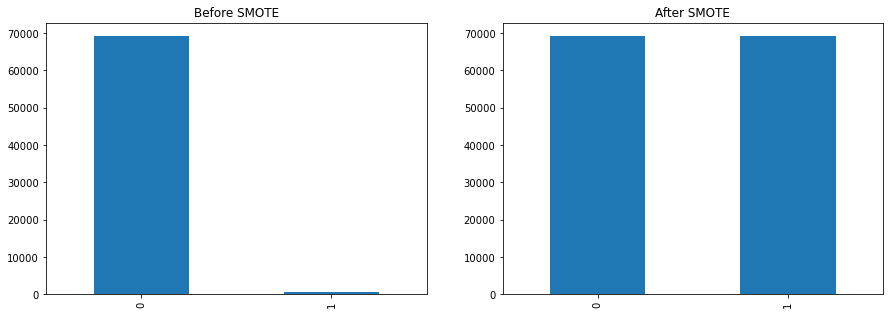

In [31]:
# solving imbalance issue
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [32]:
X_train, y_train = sm.fit_resample(X_train, y_train)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


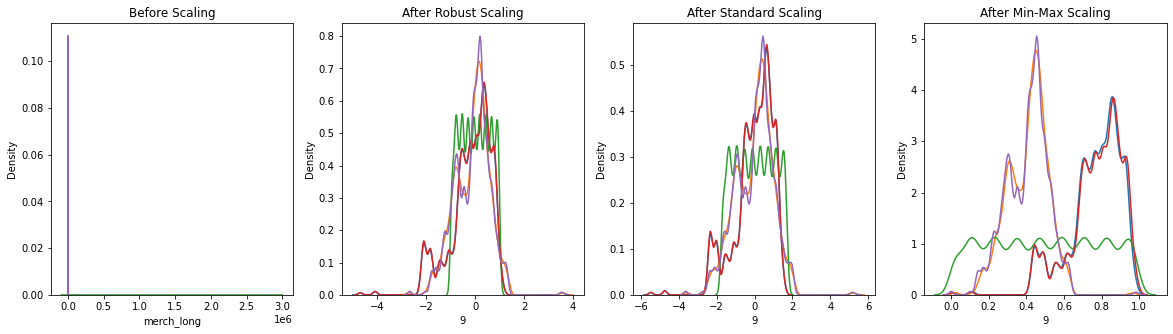

In [34]:
# to compare the effect of each scaler on our dataset
scaler = RobustScaler()
robust_df = scaler.fit_transform(df2)
print(type(robust_df))
robust_df = pd.DataFrame(robust_df)
print(type(robust_df))

scaler = StandardScaler()
standard_df = scaler.fit_transform(df2)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df2)
minmax_df = pd.DataFrame(minmax_df)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['merch_long'], ax = ax1)
sns.kdeplot(df2['merch_lat'], ax = ax1)
sns.kdeplot(df2['city_pop'], ax = ax1)
sns.kdeplot(df2['long'], ax = ax1)
sns.kdeplot(df2['lat'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[9], ax = ax2)
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[7], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[4], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[9], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[9], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)

plt.show()

In [37]:
#According to plots above, Robust Scaling is better
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
print(type(X_train))
X_test = scaler.transform(X_test)
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [43]:
#Automatic tuning
param_grid = {'n_neighbors': range(1,20)}
print(param_grid)
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid,verbose=3)
knn.fit(X_train,y_train)

{'n_neighbors': range(1, 20)}
[[ 0.95260319  0.          0.67626464 ...  0.51825485 -1.13825791
  -0.74675861]
 [-0.03392851  1.          0.41749478 ...  0.18510505 -0.32163124
  -0.35744963]
 [ 0.80685039  0.          0.76707186 ... -0.49340282  0.08415394
  -1.09904787]
 ...
 [ 1.16344458  0.         -0.79132656 ...  0.38335083  0.27241811
   0.84416035]
 [ 1.09371478  0.         -0.97100699 ... -0.52019207  0.61835261
   0.90918238]
 [ 0.1354109   1.         -0.14705263 ...  0.21261544  0.16126905
   0.1252408 ]]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .................................n_neighbors=16; total time=   2.5s
[CV 2/5] END .................................n_neighbors=16; total time=   2.6s
[CV 3/5] END .................................n_neighbors=16; total time=   2.5s
[CV 4/5] END .................................n_neighbors=16; total time=   2.4s
[CV 5/5] END .................................n_neighbors=16; total time=   2.5s
[CV 1/5] END

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [44]:
knn.best_params_

{'n_neighbors': 3}

In [45]:
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[29138   560]
 [   22   280]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.33      0.93      0.49       302

    accuracy                           0.98     30000
   macro avg       0.67      0.95      0.74     30000
weighted avg       0.99      0.98      0.99     30000



In [47]:
gnb = GaussianNB()

gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(classification_report(y_test,gnb_pred))

[[28294  1404]
 [   97   205]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     29698
           1       0.13      0.68      0.21       302

    accuracy                           0.95     30000
   macro avg       0.56      0.82      0.59     30000
weighted avg       0.99      0.95      0.97     30000



In [48]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[29059   639]
 [   52   250]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.28      0.83      0.42       302

    accuracy                           0.98     30000
   macro avg       0.64      0.90      0.70     30000
weighted avg       0.99      0.98      0.98     30000



In [57]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[29458   240]
 [   39   263]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     29698
           1       0.52      0.87      0.65       302

    accuracy                           0.99     30000
   macro avg       0.76      0.93      0.82     30000
weighted avg       0.99      0.99      0.99     30000



In [58]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

[[28230  1468]
 [   55   247]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     29698
           1       0.14      0.82      0.24       302

    accuracy                           0.95     30000
   macro avg       0.57      0.88      0.61     30000
weighted avg       0.99      0.95      0.97     30000



In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors= knn.best_params_.get('n_neighbors')),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               AdaBoostClassifier(random_state=42),
               BaggingClassifier(random_state=42)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

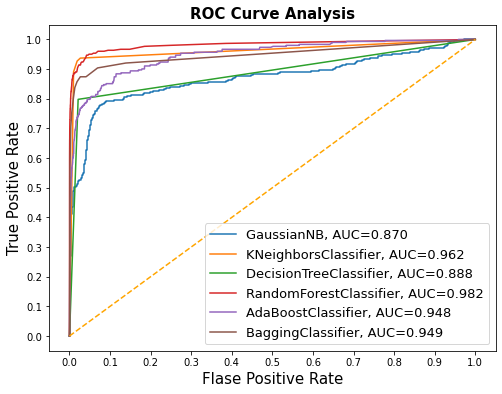

In [61]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
#RandomForestClassifer is best!